## Support Vector Machines
Here, we're using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets helps us gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

### Linear SVM
#### Example Dataset 1
We begin with a 2D example dataset which can be separated by a linear boundary. In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, there is an outlier positive example + on the far left at about (0.1, 4.1). As part of this exercise, we see how this outlier affects the SVM decision boundary.

In [2]:
data = loadmat('./ex6/ex6data1.mat')
X = data['X']
y = data['y']

In [3]:
def plotData(X, y, title):
    pos = np.where(y==1)[0]
    neg = np.where(y==0)[0]
    plt.title(title)
    plt.scatter(X[pos,0], X[pos,1], marker='+')
    plt.scatter(X[neg,0], X[neg,1], marker='o')

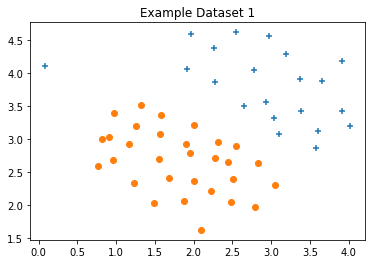

In [4]:
plotData(X, y, 'Example Dataset 1')

In this part of the exercise, we try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to 1/λ, where λ is the regularization parameter.

In [5]:
from sklearn.svm import SVC
linearSVM_1 = SVC(C=1, kernel='linear')
linearSVM_1.fit(X, np.ravel(y))

SVC(C=1, kernel='linear')

In [6]:
def visualizeBoundary(X, y, model, xlim, ylim):
    xPoints = np.linspace(xlim[0], xlim[1], 100)
    yPoints = np.linspace(ylim[0], ylim[1], 100)
    X_1, X_2 = np.meshgrid(xPoints, yPoints)
    Z = model.predict(np.array([X_1.ravel(), X_2.ravel()]).T)
    Z = Z.reshape(X_1.shape[0], X_2.shape[0])
    plt.contour(X_1, X_2, Z, levels=1, colors='b', linewidths=1)

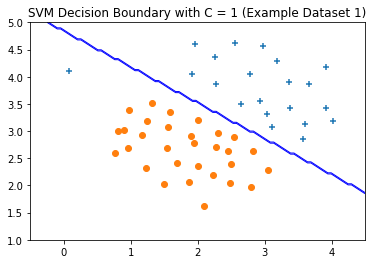

In [7]:
plotData(X, y, 'SVM Decision Boundary with C = 1 (Example Dataset 1)')
visualizeBoundary(X, y, linearSVM_1, [-0.5, 4.5], [1, 5])

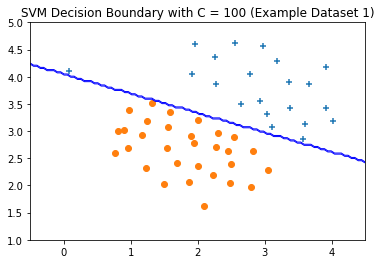

In [8]:
linearSVM_2 = SVC(C=100, kernel='linear')
linearSVM_2.fit(X, np.ravel(y))

plotData(X, y, 'SVM Decision Boundary with C = 100 (Example Dataset 1)')
visualizeBoundary(X, y, linearSVM_2, [-0.5, 4.5], [1, 5])

### SVM with Gaussian Kernels
Here we use SVMs to do non-linear classification. In particular, we use SVMs with Gaussian kernels on datasets that are not linearly separable.
#### Gaussian Kernel
To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples, (x<sup>(i)</sup>, x<sup>(j)</sup>). The Gaussian kernel is also parameterized by a bandwidth parameter, σ, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.

In [9]:
def gaussianKernel(x1, x2, sigma):
    K = np.exp(-np.sum((x1 - x2)**2)/(2*sigma**2))
    return K

In [10]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)
print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1] for sigma = 2 provides a value of', sim)

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1] for sigma = 2 provides a value of 0.32465246735834974


#### Example Dataset 2

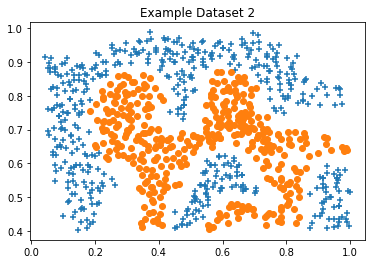

In [11]:
data = loadmat('./ex6/ex6data2.mat')
X = data['X']
y = data['y']

plotData(X, y, 'Example Dataset 2')

From the figure, we observe that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, we can learn a non-linear decision boundary that can perform reasonably well for the dataset.

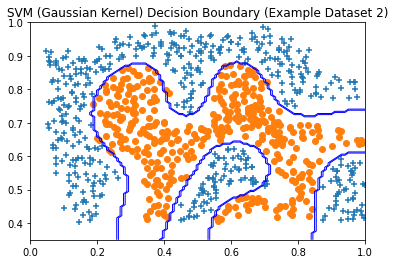

In [12]:
gaussianSVM = SVC(kernel="rbf", gamma=50)
gaussianSVM.fit(X, y.ravel())

plotData(X, y, 'SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)')
visualizeBoundary(X, y, gaussianSVM, [0, 1], [0.35, 1])

#### Example Dataset 3
In the provided dataset, we are given the variables X, y, Xval, yval. First, train the SVM classifier using the training set (X, y). The task is to use the cross validation set Xval, yval to determine the best C and σ parameter to use. For both C and σ, we try the following values in multiplicative steps (0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30)

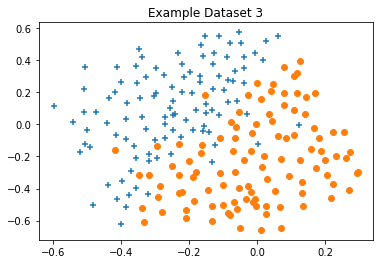

In [13]:
data = loadmat('./ex6/ex6data3.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']

plotData(X, y, 'Example Dataset 3')

In [14]:
def dataset3Params(X, y, Xval, yval):
    vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    opt_C = 0
    opt_gamma = 0
    opt_score = 0
    for i in vals:
        Cvalue = i
        for j in vals:
            sigma = j
            gammaValue = 1/(2 * sigma**2)
            clf = SVC(kernel="rbf", C=Cvalue, gamma=gammaValue)
            clf.fit(X, y.ravel())
            score = clf.score(Xval, yval.ravel())
            if(score > opt_score):
                opt_score = score
                opt_C = Cvalue
                opt_gamma = gammaValue
    
    return opt_C, opt_gamma

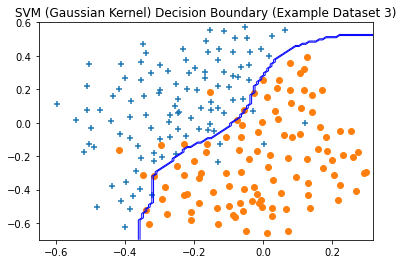

In [15]:
opt_C, opt_gamma = dataset3Params(X, y, Xval, yval)

gaussianSVM = SVC(kernel="rbf", C=opt_C, gamma=opt_gamma)
gaussianSVM.fit(X, y.ravel())

plotData(X, y, 'SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)')
visualizeBoundary(X, y, gaussianSVM, [-0.65, 0.32], [-0.7, 0.6])

## Spam Classification
We train a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0). In particular, we convert each email into a feature vector x∈R<sup>n</sup>. 
### Preprocessing Emails
We have implemented the following email preprocessing and normalization steps: 
* **Lower-casing:** The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).
* **Stripping HTML:** All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.
* **Normalizing URLs:** All URLs are replaced with the text “httpaddr”.
* **Normalizing Email Addresses:** All email addresses are replaced with the text “emailaddr”.
* **Normalizing Numbers:** All numbers are replaced with the text “number”.
* **Normalizing Dollars:** All dollar signs ($) are replaced with the text “dollar”. 
* **Word Stemming:** Words are reduced to their stemmed form. For example, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”. Sometimes, the Stemmer actually strips off additional characters from the end, so “include”, “includes”, “included”, and “including” are all replaced with “includ”.
* **Removal of non-words:** Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.


In [16]:
import re
import string
from nltk.stem import PorterStemmer

In [17]:
f = open('./ex6/emailSample1.txt','r')
file_contents = f.read()
print(file_contents)
f.close()

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In [18]:
def processEmail(email):
    email = email.lower()  #Lower-casing
    email = re.sub('<[^<>]+>', ' ', email)  #Stripping HTML
    email = re.sub('[0-9]+', 'number', email)  #Normalizing Numbers
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email)  #Normalizing URLs
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)  #Normalizing Email Addresses
    email = re.sub('[$]+', 'dollar', email)  #Normalizing Dollars
    email = email.replace('\n', ' ')  #Remove newline
    email = email.replace('\t', ' ')  #Remove tabs
    email = re.sub(' +', ' ', email)  #Replace multiple spaces with single space
    for x in string.punctuation:
        email = email.replace(x, '')  #Removal of non-words
    #email = re.sub('[^a-zA-Z0-9]', '', email)
    email = email.strip()  #Removing leading and trailing spaces from the string
    stemmer = PorterStemmer()
    l = []
    for word in email.split():
        l.append(stemmer.stem(word))  #Word Stemming
    email = ' '.join(l)
    return email

In [19]:
preprocessedEmail = processEmail(file_contents)
print(preprocessedEmail)

anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr


#### Vocabulary List
After preprocessing the emails, we have a list of words for each email. The next step is to choose which words we would like to use in
our classifier and which we would want to leave out.  

So, we have chosen only the most frequently occuring words as our set of words considered (the vocabulary list). Since words that occur rarely in the training set are only in a few emails, they might cause the model to overfit our training set. The complete vocabulary list is in the file vocab.txt. The vocabulary list was selected by choosing all words which occur at least a 100 times in the spam corpus, resulting in a list of 1899 words. In practice, a vocabulary list with about 10,000 to 50,000 words is often used. 

Given the vocabulary list, we can now map each word in the preprocessed emails into a list of word indices that contains the index of the word in the vocabulary list.

In [20]:
file = open('./ex6/vocab.txt','r')
vocabList = file.read().split('\n')
file.close()
#vocab.pop()  #Removed last item from list since it was just empty
vocabList = [i.split('\t', 1)[1] for i in vocabList]

In [21]:
print(vocabList)

['aa', 'ab', 'abil', 'abl', 'about', 'abov', 'absolut', 'abus', 'ac', 'accept', 'access', 'accord', 'account', 'achiev', 'acquir', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'adam', 'add', 'addit', 'address', 'administr', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'ae', 'af', 'affect', 'affili', 'afford', 'africa', 'after', 'ag', 'again', 'against', 'agenc', 'agent', 'ago', 'agre', 'agreement', 'aid', 'air', 'al', 'alb', 'align', 'all', 'allow', 'almost', 'alon', 'along', 'alreadi', 'alsa', 'also', 'altern', 'although', 'alwai', 'am', 'amaz', 'america', 'american', 'among', 'amount', 'amp', 'an', 'analysi', 'analyst', 'and', 'ani', 'anim', 'announc', 'annual', 'annuiti', 'anoth', 'answer', 'anti', 'anumb', 'anybodi', 'anymor', 'anyon', 'anyth', 'anywai', 'anywher', 'aol', 'ap', 'apolog', 'app', 'appar', 'appear', 'appl', 'appli', 'applic', 'appreci', 'approach', 'approv', 'apt', 'ar', 'archiv', 'area', 'aren', 'argument', 'arial', 'arm', 'around', 'arrai', 'a

In [22]:
word_indices = []
for word in preprocessedEmail.split():
    if(word in vocabList):
        word_indices.append(vocabList.index(word)+1)

In [23]:
print(word_indices)

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


### Extracting features from emails
You will now implement the feature extraction that converts each email into a vector in R<sup>n</sup>. For this exercise, you will be using n = # words in vocabulary list. Specifically, the feature x<sub>i</sub> ∈ {0, 1} for an email corresponds to whether the i-th word in the dictionary occurs in the email. That is, x<sub>i</sub> = 1 if the i-th word is in the email and x<sub>i</sub> = 0 if the i-th word is not present in the email.

In [24]:
def emailFeatures(word_indices):
    n = len(vocabList)
    x = np.zeros(n)
    for i in word_indices:
        x[i-1] = 1
    return x

In [25]:
features = emailFeatures(word_indices)
print("Feature Vector Length:",len(features))
print("Feature Vector Non-Zero Entries:",sum(features))

Feature Vector Length: 1899
Feature Vector Non-Zero Entries: 44.0


### Training SVM for Spam Classification
Load a preprocessed training dataset to train a SVM classifier. Then, test that SVM model on a test set.

In [26]:
data = loadmat('./ex6/spamTrain.mat')
X = data['X']
y = data['y']

In [27]:
X,X.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 (4000, 1899))

In [28]:
y,y.shape

(array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8),
 (4000, 1))

In [29]:
C = 0.1
model = SVC(C, kernel='linear')
model.fit(X, np.ravel(y))
print('Training Accuracy=',model.score(X, np.ravel(y))*100,'%')

D:\Applications\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass C=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training Accuracy= 99.825 %


In [30]:
data = loadmat('./ex6/spamTest.mat')
X = data['Xtest']
y = data['ytest']

In [42]:
X.shape

(1000, 1899)

In [43]:
y.shape

(1000, 1)

In [33]:
y_pred = model.predict(X)
print('Test Accuracy=',model.score(X, np.ravel(y))*100,'%')

Test Accuracy= 98.9 %


### Top Predictors for Spam
To better understand how the spam classifier works, we inspect the parameters to see which words the classifier thinks are the most predictive of spam. We find the parameters with the largest positive values in the classifier and display the corresponding words. Thus, if an email contains words such as “guarantee”, “remove”, “dollar”, and “price” (the top predictors), it is likely to be classified as spam.

In [34]:
weights = model.coef_[0]
sortedWeights = sorted(weights)
sortedIndices = np.argsort(weights)

In [35]:
print("Top predictors of spam:")
for i in range(1,16):
    print(vocabList[sortedIndices[-i]],'\t',sortedWeights[-i])

Top predictors of spam:
our 	 0.5006137361746403
click 	 0.465916390688888
remov 	 0.42286911706104086
guarante 	 0.38362160179406524
visit 	 0.367710398245535
basenumb 	 0.3450640979461706
dollar 	 0.3236320357963838
will 	 0.2697241060374008
price 	 0.2672977146177071
pleas 	 0.2611688867001495
most 	 0.2572981979518164
nbsp 	 0.2539414551595324
lo 	 0.25346652431419925
ga 	 0.24829699045568662
hour 	 0.24640435783158998
